In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

# Data preprocessing
Importing the dataset

In [2]:
df = pd.read_csv("mnist_train.csv").iloc[:,:].values
df

array([[0, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [5, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [8, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [3]:
x = df[:,1:]
y = df[:,0] 

In [4]:
from keras.utils import to_categorical
y_ = to_categorical(y)
print(y_)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


# Building the ANN

In [5]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=64,input_dim=784, activation='relu'))
ann.add(tf.keras.layers.Dense(units=10, activation='softmax'))

# Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y_,test_size = 0.1, shuffle = True)

# Training the ANN

In [7]:
ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model = ann.fit(X_train, y_train, validation_data=(X_test,y_test),batch_size = 50, epochs = 100)
model

Epoch 1/100
1080/1080 [==============================] - 28s 21ms/step - loss: 7.8837 - accuracy: 0.7385 - val_loss: 0.7289 - val_accuracy: 0.8200
Epoch 2/100
1080/1080 [==============================] - 3s 3ms/step - loss: 0.5438 - accuracy: 0.8663 - val_loss: 0.4927 - val_accuracy: 0.8825
Epoch 3/100
1080/1080 [==============================] - 5s 5ms/step - loss: 0.3510 - accuracy: 0.9058 - val_loss: 0.3965 - val_accuracy: 0.9057
Epoch 4/100
1080/1080 [==============================] - 3s 3ms/step - loss: 0.3051 - accuracy: 0.9200 - val_loss: 0.3259 - val_accuracy: 0.9173
Epoch 5/100
1080/1080 [==============================] - 3s 3ms/step - loss: 0.2528 - accuracy: 0.9324 - val_loss: 0.2895 - val_accuracy: 0.9258
Epoch 6/100
1080/1080 [==============================] - 3s 3ms/step - loss: 0.2336 - accuracy: 0.9371 - val_loss: 0.2919 - val_accuracy: 0.9312
Epoch 7/100
1080/1080 [==============================] - 3s 2ms/step - loss: 0.2013 - accuracy: 0.9440 - val_loss: 0.2681 - val_

1080/1080 [==============================] - 3s 2ms/step - loss: 0.0982 - accuracy: 0.9729 - val_loss: 0.5079 - val_accuracy: 0.9503
Epoch 58/100
1080/1080 [==============================] - 3s 2ms/step - loss: 0.0956 - accuracy: 0.9750 - val_loss: 0.5520 - val_accuracy: 0.9468
Epoch 59/100
1080/1080 [==============================] - 3s 2ms/step - loss: 0.0982 - accuracy: 0.9732 - val_loss: 0.5334 - val_accuracy: 0.9505
Epoch 60/100
1080/1080 [==============================] - 3s 2ms/step - loss: 0.0914 - accuracy: 0.9755 - val_loss: 0.5119 - val_accuracy: 0.9473
Epoch 61/100
1080/1080 [==============================] - 2s 2ms/step - loss: 0.0868 - accuracy: 0.9770 - val_loss: 0.5245 - val_accuracy: 0.9497
Epoch 62/100
1080/1080 [==============================] - 2s 2ms/step - loss: 0.0913 - accuracy: 0.9764 - val_loss: 0.5770 - val_accuracy: 0.9460
Epoch 63/100
1080/1080 [==============================] - 3s 2ms/step - loss: 0.1025 - accuracy: 0.9739 - val_loss: 0.5282 - val_accuracy

In [29]:
ann.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


# Predicting the Train set results

In [37]:
ypred = ann.predict(X_train)
ypred

array([[1.0000000e+00, 0.0000000e+00, 9.4328814e-30, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.1582684e-09, 2.4902072e-13, ..., 2.1270354e-32,
        4.3985635e-14, 0.0000000e+00],
       [0.0000000e+00, 6.7957799e-08, 9.9998510e-01, ..., 5.3999933e-08,
        8.5864709e-17, 0.0000000e+00],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        4.6145127e-28, 0.0000000e+00],
       [9.1403794e-11, 2.0183915e-02, 7.9381442e-01, ..., 1.2054511e-01,
        1.5267923e-04, 8.1083209e-13],
       [1.8591990e-09, 3.5676067e-08, 5.4672087e-06, ..., 6.0974186e-12,
        9.9997211e-01, 1.6557869e-05]], dtype=float32)

In [38]:
y_pred = ypred>0.5
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([0, 3, 2, ..., 6, 2, 8], dtype=int64)

In [39]:
ytrain_ = y_train>0.5
ytrain_ = np.argmax(ytrain_,axis=1)
ytrain_

array([0, 3, 2, ..., 6, 2, 8], dtype=int64)

# Making the Confusion Matrix

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(ytrain_, y_pred)
print(cm)
accuracy_score(ytrain_, y_pred)

[[5323    0    0    0    5    2    5    0    5    1]
 [  16 6028   15    0    0    0    0    3    3    5]
 [ 101    1 5184    7   18    0    1   11   13    1]
 [ 101    1   50 5306    0   27    0   17   10   17]
 [  51   14    1    0 5084    0   27    1    5   96]
 [  29    1    7   20    1 4708   46    1   19   13]
 [  33    1    0    0    1   19 5281    0    5    0]
 [  23    2   26   13    1    0    1 5520    1   31]
 [ 239    7   19    7    0    9   14    0 4933   44]
 [ 105    2    0   28   20   21    3   16   22 5151]]


0.9725735661771514

# Predicting the Test set results

In [30]:
ypred = ann.predict(X_test)
ypred

array([[1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.3659925e-07, 1.2734189e-16, ..., 1.4918218e-05,
        3.3097552e-10, 9.9994183e-01],
       ...,
       [2.9466410e-17, 5.1203328e-03, 4.3106029e-06, ..., 9.4758070e-01,
        1.2517181e-04, 7.0121875e-03],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.9438353e-27, 0.0000000e+00],
       [1.9027217e-01, 3.0585101e-02, 1.0631830e-01, ..., 4.2839270e-02,
        3.0487821e-01, 1.0825007e-01]], dtype=float32)

In [31]:
y_pred = ypred>0.5
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([0, 1, 9, ..., 7, 1, 0], dtype=int64)

In [32]:
ytest_ = y_test>0.5
ytest_ = np.argmax(ytest_,axis=1)
ytest_

array([0, 1, 9, ..., 7, 1, 9], dtype=int64)

# Making the Confusion Matrix

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(ytest_, y_pred)
print(cm)
accuracy_score(ytest_, y_pred)

[[570   0   0   1   3   3   3   1   1   0]
 [  4 652   5   1   1   0   3   0   5   1]
 [ 13   3 581   6   7   1   1   3   4   2]
 [ 11   3  10 562   0   5   0   3   4   4]
 [  5   2   3   0 522   0   5   3   4  19]
 [  3   0   1  13   1 535  12   2   3   5]
 [  5   1   0   0   2   3 565   0   2   0]
 [  7   3   5   4   3   2   0 607   2  14]
 [ 24   3   6   4   3   6   2   1 519  11]
 [ 10   0   0   3  10   7   0   4   1 546]]


0.9431666666666667

In [34]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)
print('False Positives\n {}'.format(FP))
print('False Negetives\n {}'.format(FN))
print('True Positives\n {}'.format(TP))
print('True Negetives\n {}'.format(TN))
TPR = TP/(TP+FN)
print('Sensitivity \n {}'.format(TPR))
TNR = TN/(TN+FP)
print('Specificity \n {}'.format(TNR))
Precision = TP/(TP+FP)
print('Precision \n {}'.format(Precision))
Recall = TP/(TP+FN)
print('Recall \n {}'.format(Recall))
Acc = (TP+TN)/(TP+TN+FP+FN)
print('Áccuracy \n{}'.format(Acc))
Fscore = 2*(Precision*Recall)/(Precision+Recall)
print('FScore \n{}'.format(Fscore))

False Positives
 [82 15 30 32 30 27 26 17 26 56]
False Negetives
 [12 20 40 40 41 40 13 40 60 35]
True Positives
 [570 652 581 562 522 535 565 607 519 546]
True Negetives
 [5336 5313 5349 5366 5407 5398 5396 5336 5395 5363]
Sensitivity 
 [0.97938144 0.9702381  0.93558776 0.93355482 0.92717584 0.93043478
 0.97750865 0.9381762  0.89637306 0.93975904]
Specificity 
 [0.98486526 0.99718468 0.99442276 0.99407188 0.99448225 0.99502304
 0.99520472 0.99682421 0.99520384 0.98966599]
Precision 
 [0.87423313 0.97751124 0.95090016 0.94612795 0.94565217 0.9519573
 0.95600677 0.97275641 0.95229358 0.90697674]
Recall 
 [0.97938144 0.9702381  0.93558776 0.93355482 0.92717584 0.93043478
 0.97750865 0.9381762  0.89637306 0.93975904]
Áccuracy 
[0.98433333 0.99416667 0.98833333 0.988      0.98816667 0.98883333
 0.9935     0.9905     0.98566667 0.98483333]
FScore 
[0.92382496 0.97386109 0.94318182 0.93979933 0.93632287 0.941073
 0.96663815 0.95515342 0.92348754 0.92307692]


In [35]:
training_loss = model.history['loss']
epoch_count = range(1, len(training_loss) + 1)

# plot of the loss vs. epochs

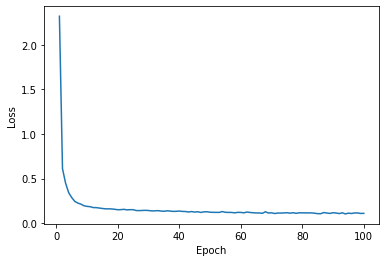

In [36]:
import matplotlib.pyplot as plt
plt.plot(epoch_count, training_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();